In [2]:
import scipy
import numpy
import math

###Критерий Вальда

In [3]:
a0 = -12.7
a1 = -11.9

In [4]:
alpha = 0.1
beta = 0.153

$A = \frac{1-\beta}{\alpha},$
$B = \frac{\beta}{1-\alpha}$

In [5]:
A = (1 - beta) / alpha
B = beta / (1 - alpha)
f'{A=}, {B=}'

'A=8.469999999999999, B=0.16999999999999998'

$M_i\nu = \frac{M_ilnz_{\nu}}{M_iY_k}$

$z_n = \frac{L(X_1, X_2, ...,, X_n, a_0)}{L(X_1, X_2, ...,, X_n, a_1)}$

$Y_k = ln\frac{L(X_k, a_0)}{L(X_k, a_1)}$

$M_0lnz_{\nu}=\alpha⋅lnA+(1-\alpha)⋅lnB$

$M_1lnz_{\nu}=(1-\beta)⋅lnA+\beta⋅lnB$

In [6]:
M0z = math.log(A) * alpha + math.log(B) * (1 - alpha)
M1z = math.log(A) * (1 - beta) + math.log(B) * beta
f'{M0z=}, {M1z=}'

'M0z=-1.3811081068722917, M1z=1.5385319440227998'

#####Нормальное распределение (матожидание = $а$)

In [7]:
M0y = -4 * (a0 - a1) * a0 + 2 * (a0 ** 2) - 2 * (a1 ** 2)
M1y = -4 * (a0 - a1) * a1 + 2 * (a0 ** 2) - 2 * (a1 ** 2)
f'{M0y=}, {M1y=}'

'M0y=-1.2799999999999727, M1y=1.2800000000000296'

#####Пуассон (матожидание = $а$)

In [ ]:
M0y = a0 * math.log(a1 / a0) + a0 - a1
M1y = a1 * math.log(a1 / a0) + a0 - a1
f'{M0y=}, {M1y=}'

#####Геометрический закон $(1-p)^np$ (матожидание = $1/а$)

In [ ]:
M0y = math.log((1 - a1) / (1 - a0)) * (1 - a0) / a0 + math.log(a1 / a0)
M1y = math.log((1 - a1) / (1 - a0)) * (1 - a1) / a1 + math.log(a1 / a0)
f'{M0y=}, {M1y=}'

#####Закон Эрланга (матожидание = $k/a$)

In [ ]:
k = 2
M0y = k * math.log(a1 / a0) + (a0 - a1) * k / a0
M1y = k * math.log(a1 / a0) + (a0 - a1) * k / a1
f'{M0y=}, {M1y=}'

#####Распределение Бернулли

In [ ]:
M0y = a0 * math.log(a1 / a0) + (1 - a0) * math.log((1 - a1) / (1 - a0))
M1y = a1 * math.log(a1 / a0) + (1 - a1) * math.log((1 - a1) / (1 - a0))
f'{M0y=}, {M1y=}'

####Среднее число испытаний

In [8]:
M0 = M0z / M0y
M1 = M1z / M1y
f'{M0=}, {M1=}'

'M0=1.078990708494001, M1=1.2019780812677845'

###Критерий Пирсона

In [ ]:
n = 88273 # Если дано
m = 7

In [ ]:
alpha = 0.05

$\frac{\nu}{n}$ - эмпирические вероятности

In [ ]:
nu = numpy.array([400, 167, 29, 3, 0, 0, 1])
n = nu.sum() # Если дан только массив
m = len(nu)
print(f'{n=}, {m=}', nu)

n=600, m=7 [400 167  29   3   0   0   1]


$p$ - теоретические вероятности

In [ ]:
# np = numpy.array([0.2 * n for i in range(m)]) # при равновероятных событиях
np = numpy.array([(31 / 365) * n, (28 / 365) * n, (31 / 365) * n, (30 / 365) * n,
                  (31 / 365) * n, (30 / 365) * n, (31 / 365) * n, (31 / 365) * n,
                  (30 / 365) * n, (31 / 365) * n, (30/ 365) * n, (31 / 365) * n]) # при неравновероятных событиях
n, np

'n=88273, np=array([7497.15890411, 6771.62739726, 7497.15890411, 7255.31506849,\n       7497.15890411, 7255.31506849, 7497.15890411, 7497.15890411,\n       7255.31506849, 7497.15890411, 7255.31506849, 7497.15890411])'

Если $np_k < 5$, необходимо объединять интервалы!!

In [ ]:
f = True
for el in np:
  f *= el > 5
f'Требуется oбъединение интервалов: {not f}'

'Требуется oбъединение интервалов: False'

Статистика $\chi^2_в=\sum_{k=1}^{n}\frac{(\nu_k-np_k)^2}{np_k}$

In [ ]:
chiv = ((nu - np) ** 2 / np).sum()
f'{chiv=}'

'chiv=259.63935444177736'

Квантиль $\chi^2_{1-\alpha}(m-1)$

In [ ]:
chi2 = scipy.stats.chi2.ppf(1 - alpha, m - 1)
f'{chi2=}'

'chi2=19.67513757268249'

Критерий $S = \{\chi^2_в \geq \chi^2_{1-\alpha}(m-1)\}$

In [ ]:
ans = True if chiv < chi2 else False
f'H0 принимается: {ans}'

'H0 принимается: False'

###Непараметрические критерии

In [ ]:
alpha = 0.05

In [ ]:
nu = numpy.array([400, 167, 29, 3, 0, 0, 1])
n = nu.sum() # Если дан только массив
m = len(nu)
print(f'{n=}, {m=}', nu)

n=600, m=7 [400 167  29   3   0   0   1]


Оценка параметра (зависит от гипотезы H0)

In [ ]:
l = numpy.mean(nu)
l

85.71428571428571

In [ ]:
p = numpy.array([scipy.stats.poisson.pmf(i, l) for i in range(len(nu))])
sum(n * p)

2.1135595565787816e-26

In [ ]:
nu = numpy.array([5, 8, 12, 20, 26, 15, 10, 4])
inte = numpy.array([i * 0.1 + 5.1 for i in range(len(nu))])
print(inte)
n = nu.sum() # Если дан только массив
x = (nu * inte).sum() / n
a = x
s = ((nu * (inte - a) ** 2).sum() / n) ** 0.5
np = [(2.7 ** (l * i) - 2.7 ** (l * (i + 1))) * n for i in range(5)]
np = numpy.array([277, 147, 78, 41, 47])
# np = numpy.array([((1/6) ** i) * ((5/6) ** (m - i)) * n for i in range(m)])
# np[-1] = 0
# np[-1] = 1 - sum(np)
f'{x=}, {a=}, {s=}, {n=}, {np=}'

[5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8]


'x=5.459, a=5.459, s=0.1715196781713399, n=100, np=array([277, 147,  78,  41,  47])'

In [ ]:
scipy.stats.norm.cdf

In [ ]:
scipy.stats.norm.cdf((5.15 - a) / s)

0.03580870277101354

In [ ]:
scipy.stats.norm.cdf((5.25 - a) / s) - scipy.stats.norm.cdf((5.15 - a) / s)

0.07570468704758056

In [ ]:
scipy.stats.norm.cdf((5.35 - a) / s) - scipy.stats.norm.cdf((5.25 - a) / s)

0.15103922943273013

In [ ]:
scipy.stats.norm.cdf((5.45 - a) / s) - scipy.stats.norm.cdf((5.35 - a) / s)

0.21652363825525361

In [ ]:
arr = [scipy.stats.norm.cdf((inte[i] + 0.05 - a) / s) - scipy.stats.norm.cdf((inte[i] - 0.05 - a) / s) for i in range(len(nu))]
arr[0] = scipy.stats.norm.cdf((5.15 - a) / s)
arr[-1] = 1 - numpy.array(arr[:-1]).sum()
arr

[0.03580870277101354,
 0.0757046870475801,
 0.15103922943273013,
 0.2165236382552515,
 0.22305889086835445,
 0.1651340413413861,
 0.0878444976492897,
 0.044886312634394465]

In [ ]:
np = numpy.array(arr) * n
np

array([ 3.58087028,  7.5704687 , 15.10392294, 21.65236383, 22.30588909,
       16.51340413,  8.78444976,  4.48863126])

In [ ]:
numpy.array([((1/6) ** i) * ((5/6) ** (m - i)) for i in range(m)])

array([1.12156655e-01, 2.24313310e-02, 4.48626619e-03, 8.97253238e-04,
       1.79450648e-04, 3.58901295e-05, 7.17802591e-06, 1.43560518e-06,
       2.87121036e-07, 5.74242072e-08, 1.14848414e-08, 2.29696829e-09])

In [ ]:
(1/6)*(5/6) ** 11

0.022431330956923026

In [ ]:
chiv = ((nu - np) ** 2 / np).sum()
f'{chiv=}'

'chiv=2.3226316180526108'

In [ ]:
m = 8

In [ ]:
alpha = 0.01

In [ ]:
chi2 = scipy.stats.chi2.ppf(1 - alpha, 4)
f'{chi2=}'

'chi2=13.276704135987622'

In [ ]:
import math

In [ ]:
l = 29 / 60
[l ** i * 2.7 ** (-l) * 60 / math.factorial(i) for i in range(4)]

[37.12434195818788, 17.943431946457473, 4.336329387060555, 0.6986308456930895]

In [ ]:
nu = numpy.array([5, 8, 12, 20, 26, 15, 10, 4])
inte = numpy.array([i * 0.1 + 5.1 for i in range(len(nu))])
print(inte)
n = nu.sum() # Если дан только массив
x = (nu * inte).sum() / n
a = x
s = ((nu * (inte - a) ** 2).sum() / n) ** 0.5
np = [(2.7 ** (l * i) - 2.7 ** (l * (i + 1))) * n for i in range(5)]
np = numpy.array([277, 147, 78, 41, 47])
# np = numpy.array([((1/6) ** i) * ((5/6) ** (m - i)) * n for i in range(m)])
# np[-1] = 0
# np[-1] = 1 - sum(np)
f'{x=}, {a=}, {s=}, {n=}, {np=}'

In [ ]:
m = numpy.array([[45, 26, 12], [35, 50, 21], [4, 10, 17]])

In [ ]:
m

array([[45, 26, 12],
       [35, 50, 21],
       [ 4, 10, 17]])

In [ ]:
rows = [m[i].sum() for i in range(3)]
rows

[83, 106, 31]

In [ ]:
cols = [numpy.matrix.transpose(m)[i].sum() for i in range(3)]
cols

[84, 86, 50]

In [ ]:
n = m.sum().sum()
n

220

[0.290447504302926, 0.13757861635220126, 0.006144393241167435]
[0.0947043989913141, 0.27424308907415534, 0.037509377344336084]
[0.03469879518072289, 0.08320754716981132, 0.18645161290322582]


In [ ]:
X = [-0.29, -0.12, 0.16, -1.2, 1.29, -1.15, -0.91, 1.06, 1.09, 1.22]
X = sorted(X)
print(X)
Y = numpy.array([scipy.stats.norm.cdf(X[i]) for i in range(len(X))])
Y

[-1.2, -1.15, -0.91, -0.29, -0.12, 0.16, 1.06, 1.09, 1.22, 1.29]


array([0.11506967, 0.12507194, 0.18141125, 0.38590812, 0.45224157,
       0.56355946, 0.8554277 , 0.86214343, 0.88876756, 0.90147467])

In [ ]:
i = numpy.array([(2 * (i + 1) - 1) / 20 for i in range(len(X))])
i

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [ ]:
max(numpy.absolute(Y - i) + 0.05)

0.25542770033609036

In [ ]:
numpy.absolute(Y - i) + 0.05

array([0.11506967, 0.07492806, 0.11858875, 0.08590812, 0.05224157,
       0.06355946, 0.2554277 , 0.16214343, 0.08876756, 0.09852533])

###Гипотеза о независимости признаков

In [ ]:
matr = numpy.array([[11, 17, 16],
                [20, 23, 19]])

In [ ]:
m = matr.shape[0]
k = matr.shape[1]

In [ ]:
matr

array([[11, 17, 16],
       [20, 23, 19]])

In [ ]:
rows = [matr[i].sum() for i in range(m)]
rows

[44, 62]

In [ ]:
cols = [numpy.matrix.transpose(matr)[i].sum() for i in range(k)]
cols

[31, 40, 35]

In [ ]:
n = matr.sum()
n

106

In [ ]:
chi2_v = []
for j in range(k):
  chi2_v.append([matr[i, j] ** 2 / (rows[i] * cols[j]) for i in range(m)])

chi2_v = n * (numpy.array(chi2_v).sum() - 1)
chi2_v

0.7346258969958481

In [ ]:
chi_crit = scipy.stats.chi2.ppf(0.95, (m - 1) * (k - 1))
chi_crit

5.991464547107979

In [ ]:
ans = True if chi2_v < chi_crit else False
f'Признаки независимы: {ans}'

'Признаки независимы: True'

###Критерий Колмогорова-Смирнова

In [10]:
from scipy.stats import kstest

$H_0$: законы распределения $X_k$ и $Y_k$ совпадают

In [18]:
alpha = 0.05

In [11]:
X = numpy.array([6, 10, 10, 7, 5, 2, 0, 0, 0])
Y = numpy.array([1, 4, 8, 7, 7, 6, 5, 1, 1])

In [12]:
n = sum(X)
m = sum(Y)
n, m

(40, 40)

Эмпирические функции распределения:

In [13]:
Fx = X.cumsum() / n
Fx

array([0.15 , 0.4  , 0.65 , 0.825, 0.95 , 1.   , 1.   , 1.   , 1.   ])

In [14]:
Fy = Y.cumsum() / m
Fy

array([0.025, 0.125, 0.325, 0.5  , 0.675, 0.825, 0.95 , 0.975, 1.   ])

Статистика $D_{n,m}=sup|\hat{F_X(x)}-\hat{F_Y(x)}|$

In [15]:
D = max(numpy.absolute(Fx - Fy))
D

0.325

Критерий: $S = \{\sqrt{\frac{mn}{m + n}}D_{n,m}>\lambda_{1-\alpha}\}$

In [16]:
criteria = math.sqrt(m * n / (n + m)) * D
criteria

1.4534441853748634

$\lambda_{кр}$ выбираем из таблицы:

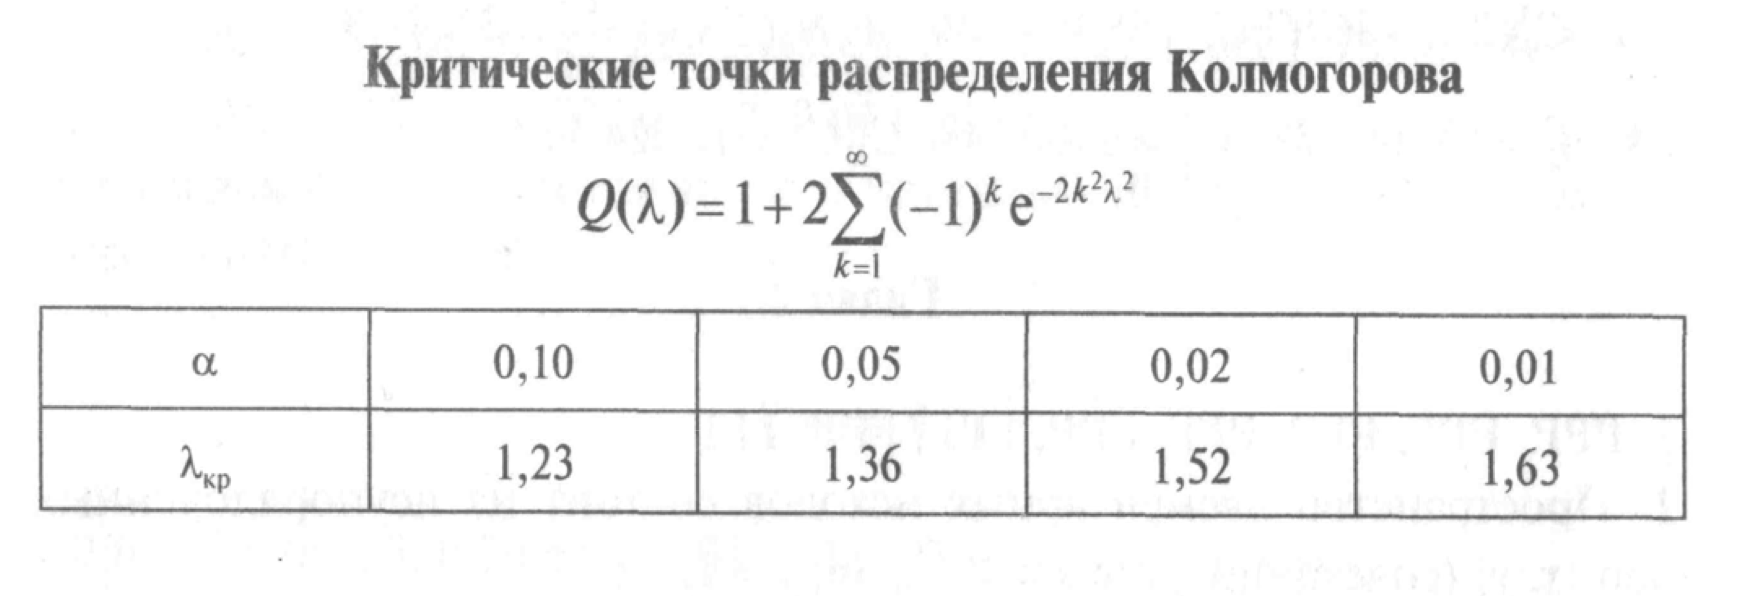

In [19]:
lambda_crit = 1.36

In [21]:
ans = True if criteria <= lambda_crit else False
f'H0 принимается: {ans}'

'H0 принимается: False'

###Двумерная выборка

Если $r ≠ 0$

In [ ]:
n = 28
r_v = 0.88
alpha = 0.05

In [ ]:
u = scipy.stats.norm.ppf(1 - alpha / 2)

In [ ]:
left = math.tanh(math.atanh(r_v) - r_v / (2 * (n - 1)) - u / math.sqrt(n - 3))

In [ ]:
right = math.tanh(math.atanh(r_v) - r_v / (2 * (n - 1)) + u / math.sqrt(n - 3))

In [ ]:
(left, right)

(0.7475941687257226, 0.9415419478042537)

Теорема Фишера

In [ ]:
alpha = 0.1

In [ ]:
math.sqrt(1/121 + 1/144)

0.1233243984553008

In [ ]:
scipy.stats.norm.ppf(1 - alpha/2)

1.6448536269514722

In [ ]:
(math.atanh(-0.65) - math.atanh(-0.87)) / math.sqrt(1/121 + 1/144)

4.522875687839744

In [ ]:
math.tanh(-1.64 * math.sqrt(1/121 + 1/144) + math.atanh(-0.87))

-0.9113325663582437

In [ ]:
math.tanh(1.64 * math.sqrt(1/121 + 1/144) + math.atanh(-0.87))

-0.8113023218396664

Если $r = 0$

In [ ]:
n = 39
r_v = 0.15
alpha = 0.1

In [ ]:
t = scipy.stats.t.ppf(alpha, n - 2)
t

1.6870936167109873

In [ ]:
t_v = r_v * math.sqrt(n - 2) / math.sqrt(1 - r_v ** 2)
t_v

0.9228555705483232

Для проверки гипотез:

In [ ]:
t_v = scipy.stats.t.ppf(1 - alpha, n - 2)

In [ ]:
C = t_v / (math.sqrt(t_v ** 2 + n - 2))
C

0.20974505226246665